In [2]:
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from src.linear_model import LinearModel

In [28]:
class Weighted_LinearRegression(LinearModel):
    def __init__(self, step_size=0.2, max_iter=100, eps=0.00001, theta=None, verbose=True,tau=0.5):
        super().__init__(step_size, max_iter, eps, theta, verbose)
        self.tau=tau
        
    def predict(self,x,y,x_pred):
        m,_=x.shape
        n,_=x_pred.shape
        prediction=np.array([])
        for j in range(n):
            i=x_pred[j,-1]
            weight_vector=np.exp(-(x[:,-1]-i)*(x[:,-1]-i)/(2*self.tau**2))
            w=np.diag(weight_vector)
            xwx_inv=np.linalg.inv((x.T)@ w @x)
            theta=xwx_inv@(x.T)@w@y
            theta_x= theta@x_pred[j,:]
            prediction=np.append(prediction,theta_x)
        return prediction
    
    def MSE(self,y_pred,y_valid):
        n,=y_pred.shape
        dif=y_pred-y_valid
        return (1/n)*(dif@dif)



In [29]:
x_train, y_train = util.load_dataset('data/ds5_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds5_valid.csv', add_intercept=True)
x_test, y_test = util.load_dataset('data/ds5_test.csv', add_intercept=True)

In [30]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

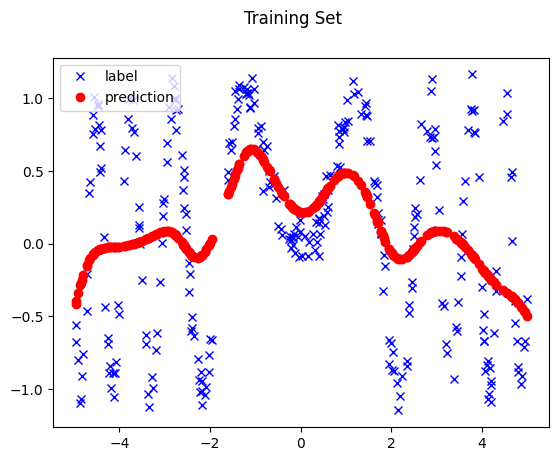

In [31]:
lwr=Weighted_LinearRegression()
y_train_pred=lwr.predict(x_train,y_train,x_train)
plot(x_train, y_train, y_train_pred, 'Training Set')
# print(y_train_pred)

Tau = 0.05 achieves the lowest MSE on the validation set.


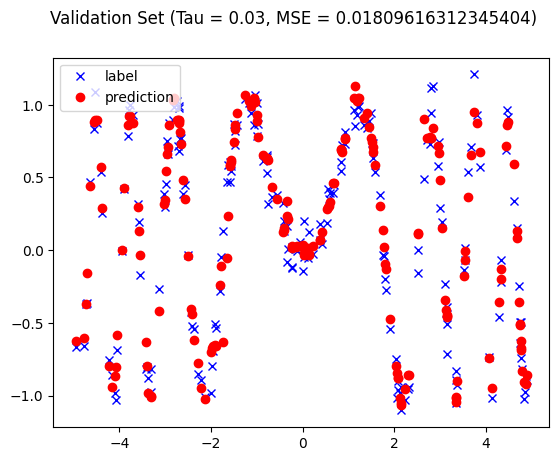

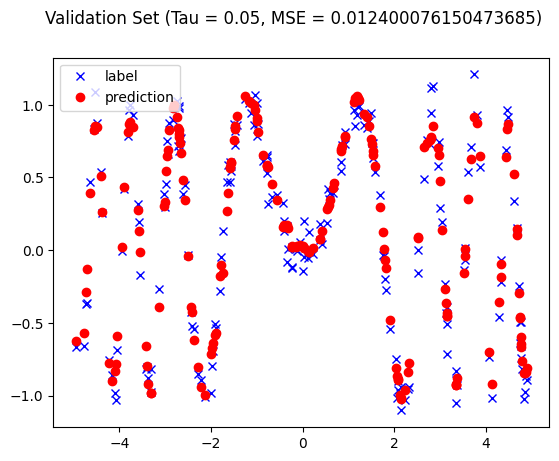

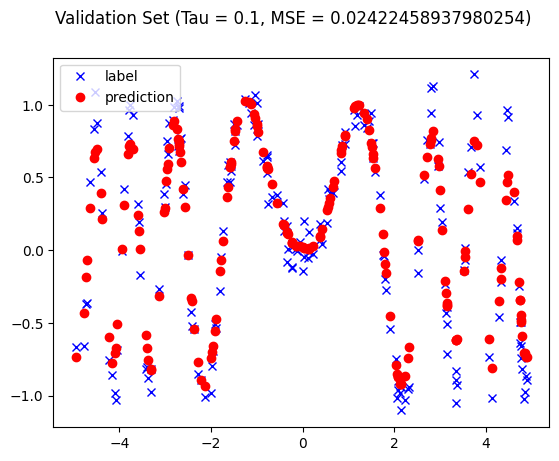

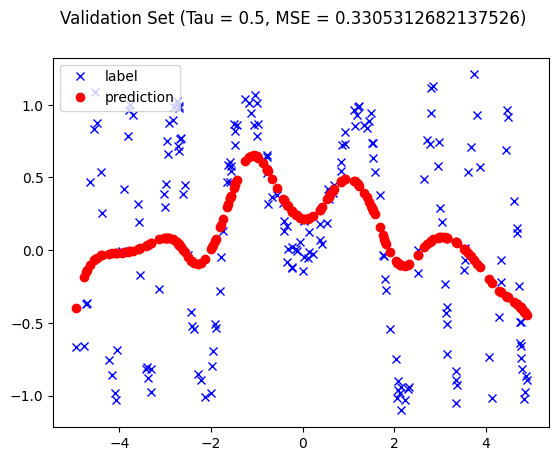

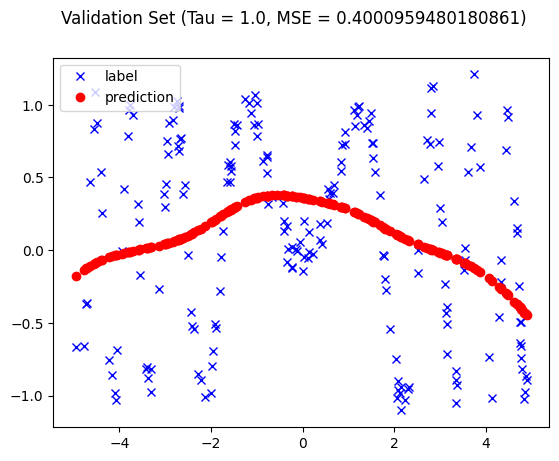

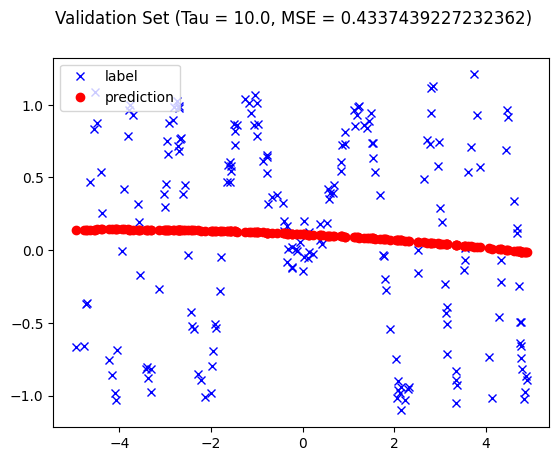

In [32]:
taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
import math

lowest_mse = math.inf
best_tau = taus[0]

for tau in taus:
    lwr=Weighted_LinearRegression(tau=tau)
    y_valid_pred=lwr.predict(x_train,y_train,x_valid)
    mse=lwr.MSE(y_valid_pred,y_valid)
    if mse<lowest_mse:
        lowest_mse=mse
        best_tau=tau
    plot(x_valid,y_valid,y_valid_pred,f'Validation Set (Tau = {tau}, MSE = {mse})')

print(f'Tau = {best_tau} achieves the lowest MSE on the validation set.')


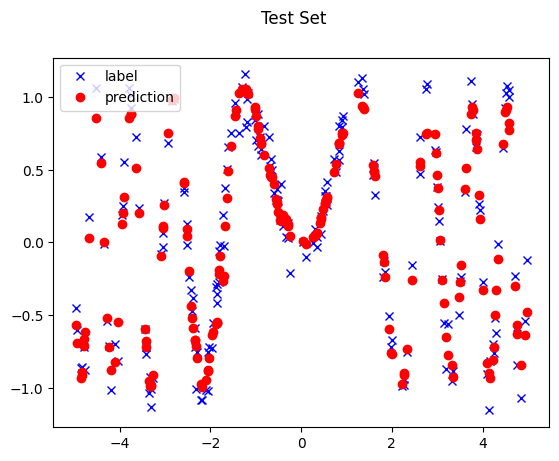

In [35]:
lwr=Weighted_LinearRegression(tau=best_tau)
y_test_pred=lwr.predict(x_train,y_train,x_test)
plot(x_test,y_test,y_test_pred,'Test Set')